In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/data/water_quality_prediction.csv"
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [2]:
features_to_drop = ['Index', 'Color', 'Source','Month','Day','Time of Day','Conductivity','Water Temperature','Air Temperature']
df.drop(columns=features_to_drop, inplace=True)


In [3]:
print(df.columns)

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Chlorine', 'Manganese',
       'Total Dissolved Solids', 'Target'],
      dtype='object')


In [4]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
count,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,1.017243e+06,1.014050e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.048575e+06
mean,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,1.772788e+00,1.446009e+02,3.236978e+00,9.352826e-02,2.647872e+02,2.295821e-01
std,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,1.051316e+00,6.672156e+01,7.150808e-01,4.403703e-01,1.543697e+02,4.205643e-01
min,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,1.100125e-02,1.194073e+01,9.994110e-01,1.380000e-46,1.064299e-02,0.000000e+00
25%,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,8.772584e-01,9.746143e+01,2.737515e+00,2.060000e-06,1.318069e+02,0.000000e+00
50%,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,1.744323e+00,1.339778e+02,3.198937e+00,5.372950e-04,2.635694e+02,0.000000e+00
75%,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,2.611824e+00,1.803459e+02,3.685177e+00,1.369394e-02,3.949597e+02,0.000000e+00
max,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,4.141991e+00,1.393433e+03,1.068842e+01,2.374086e+01,5.797995e+02,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   pH                      1028344 non-null  float64
 1   Iron                    1041584 non-null  float64
 2   Nitrate                 1029880 non-null  float64
 3   Chloride                1017741 non-null  float64
 4   Lead                    1043891 non-null  float64
 5   Zinc                    1020900 non-null  float64
 6   Turbidity               1039881 non-null  float64
 7   Fluoride                1015357 non-null  float64
 8   Copper                  1013693 non-null  float64
 9   Odor                    1017243 non-null  float64
 10  Sulfate                 1014050 non-null  float64
 11  Chlorine                1038413 non-null  float64
 12  Manganese               1029236 non-null  float64
 13  Total Dissolved Solids  1048277 non-null  float64
 14  Ta

In [6]:
# Виведення кількості пропусків у кожному стовпці
missing_values = df.isnull().sum()
print(missing_values)

# Відсоток пропусків у кожному стовпці
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Target                        0
dtype: int64
pH                        1.929380
Iron                      0.666714
Nitrate                   1.782896
Chloride                  2.940562
Lead                      0.446701
Zinc                      2.639296
Turbidity                 0.829125
Fluoride                  3.167918
Copper                    3.326610
Odor                      2.988055
Sulfate                   3.292564
Chlorine                  0.969125
Manganese                 1.844313
Total Dissolved Solids    0.028420
Target           

In [7]:
# Заповнення пропусків медіанними значеннями в решті стовпців
data = df.fillna(df.median())

In [8]:
# Перевірка результатів
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   pH                      1048575 non-null  float64
 1   Iron                    1048575 non-null  float64
 2   Nitrate                 1048575 non-null  float64
 3   Chloride                1048575 non-null  float64
 4   Lead                    1048575 non-null  float64
 5   Zinc                    1048575 non-null  float64
 6   Turbidity               1048575 non-null  float64
 7   Fluoride                1048575 non-null  float64
 8   Copper                  1048575 non-null  float64
 9   Odor                    1048575 non-null  float64
 10  Sulfate                 1048575 non-null  float64
 11  Chlorine                1048575 non-null  float64
 12  Manganese               1048575 non-null  float64
 13  Total Dissolved Solids  1048575 non-null  float64
 14  Ta

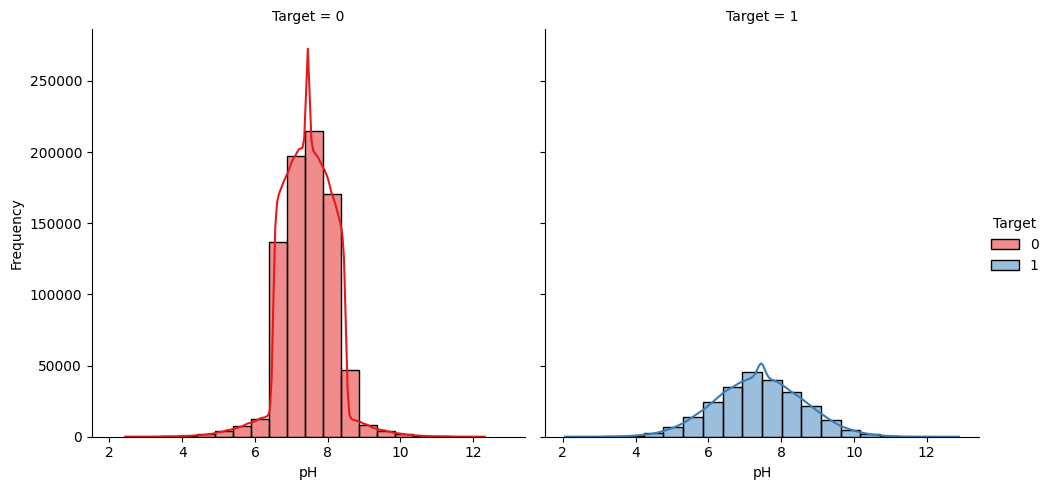

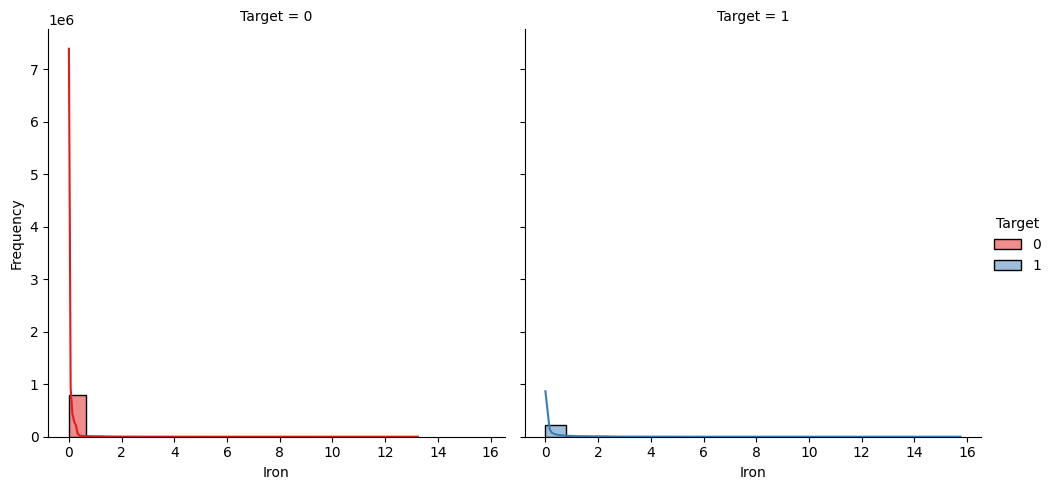

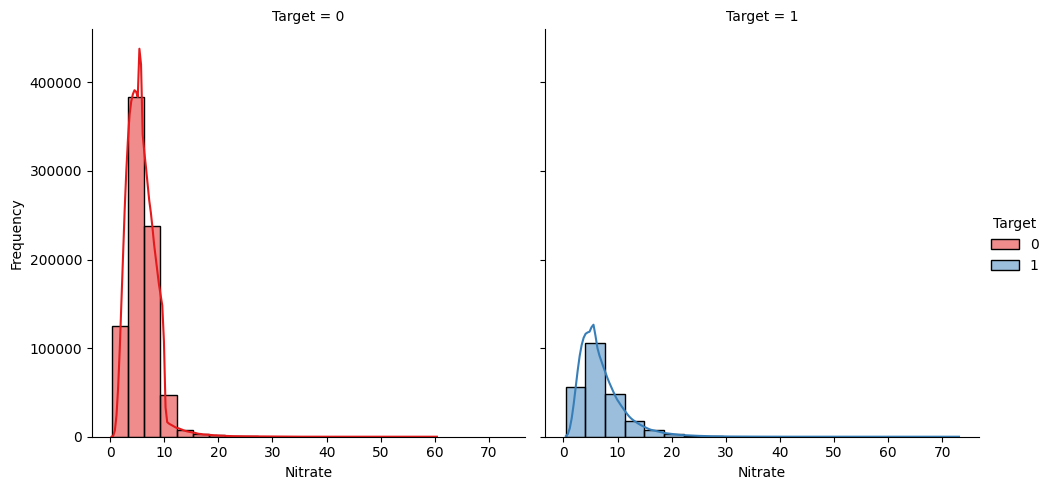

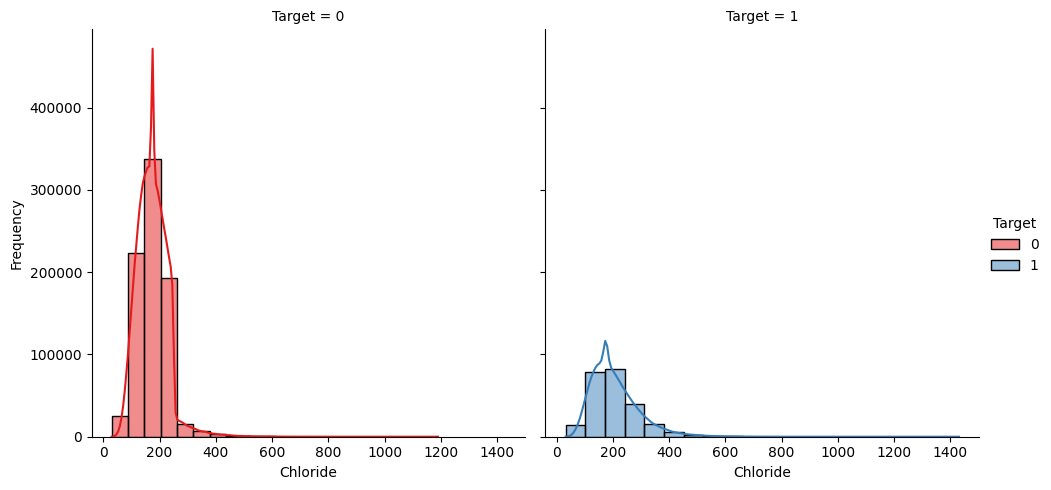

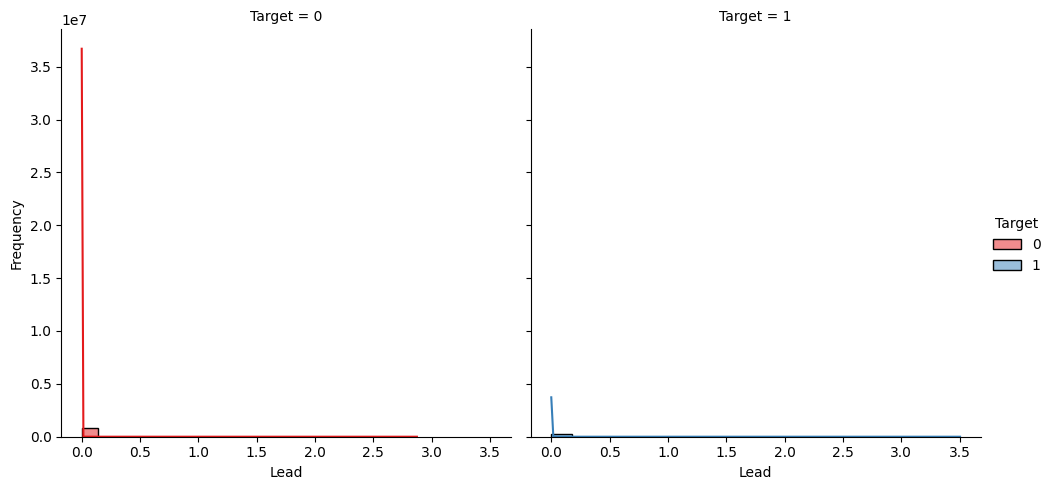

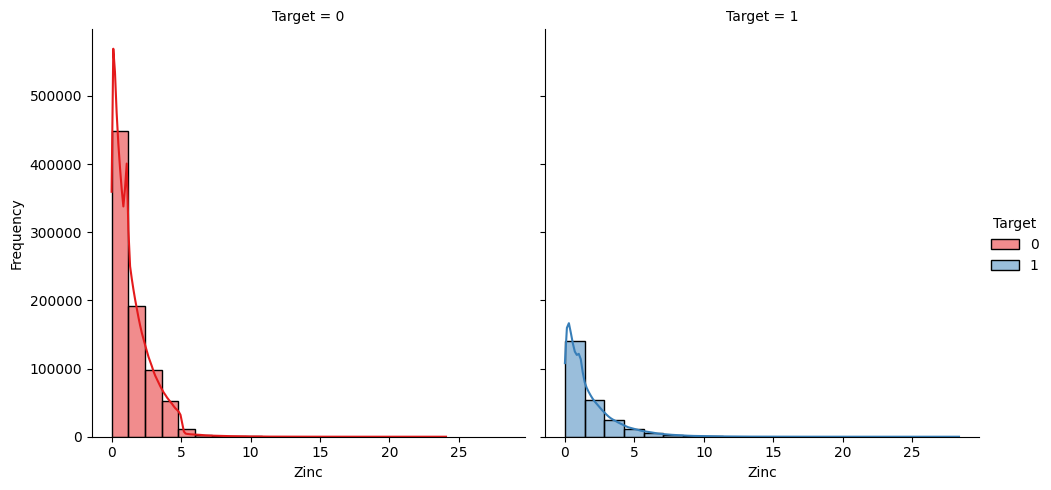

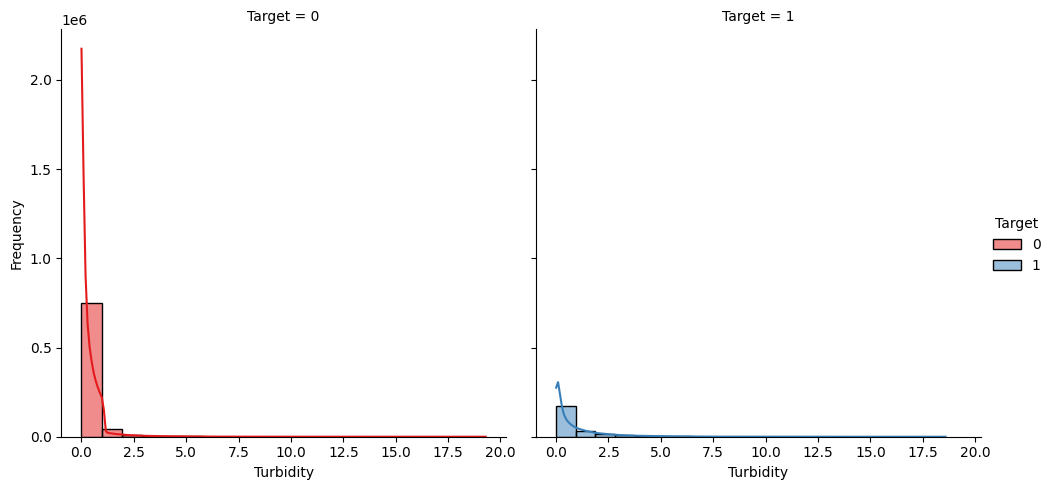

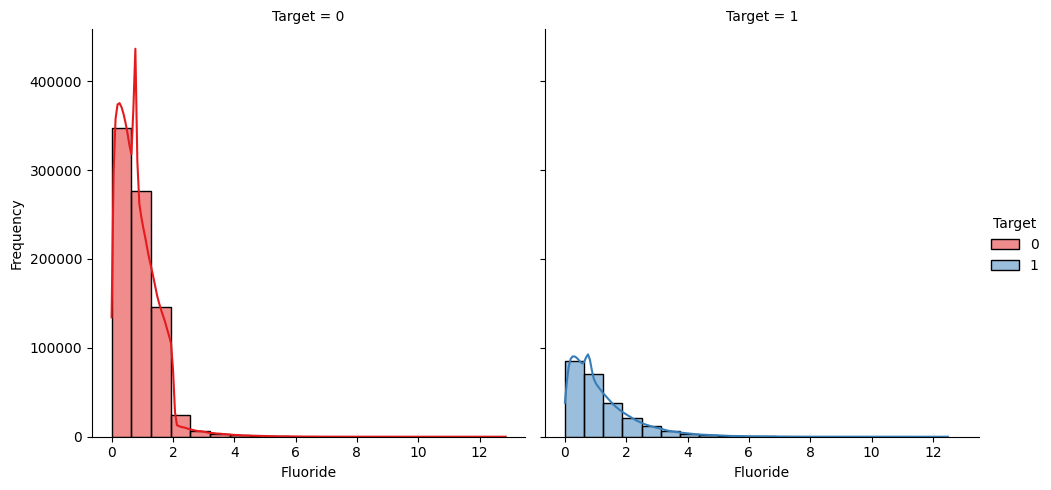

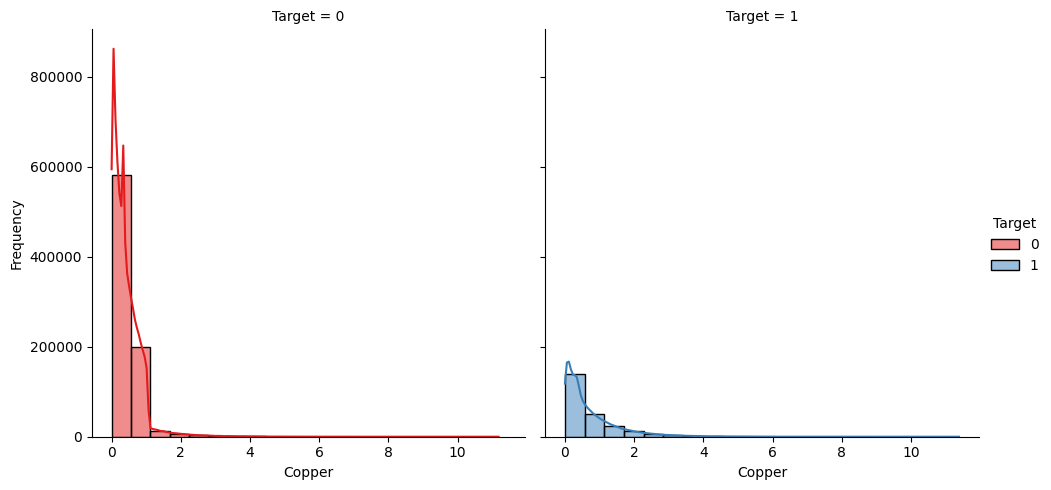

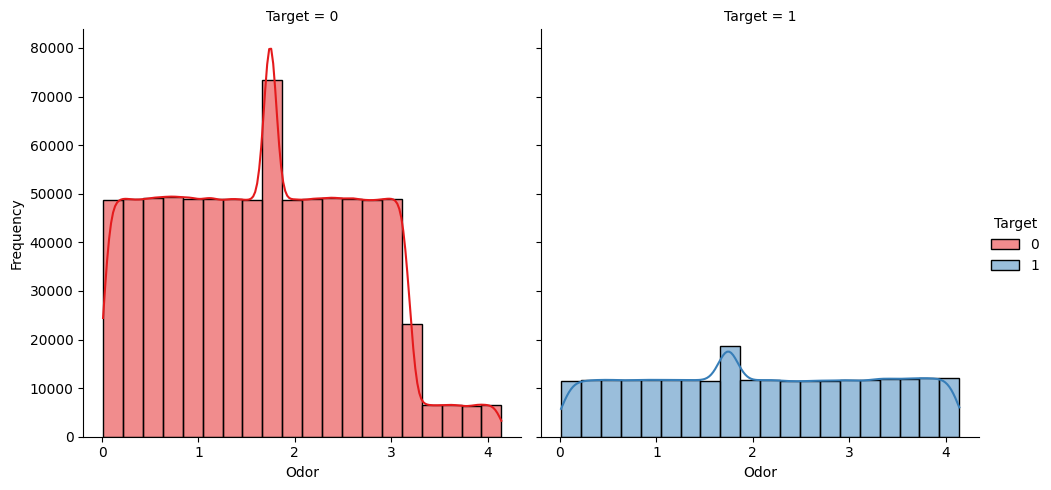

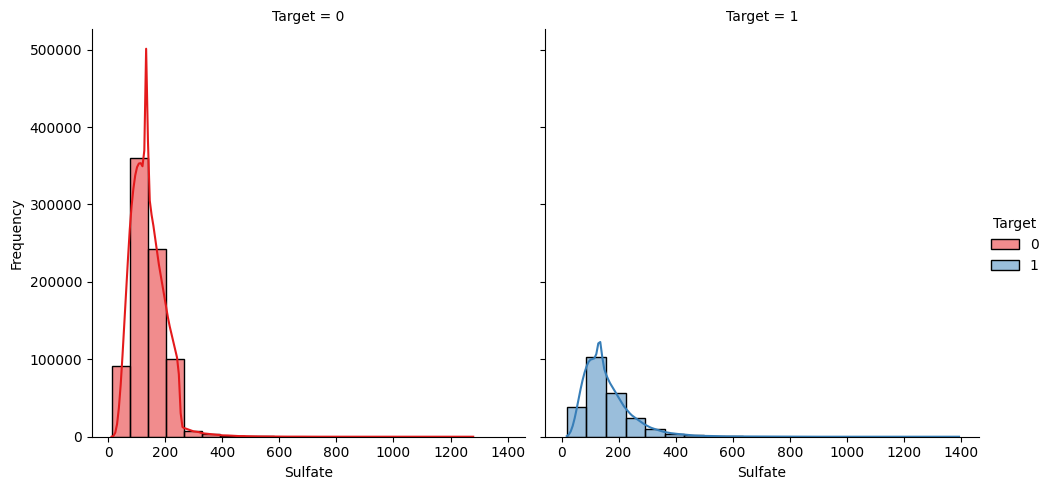

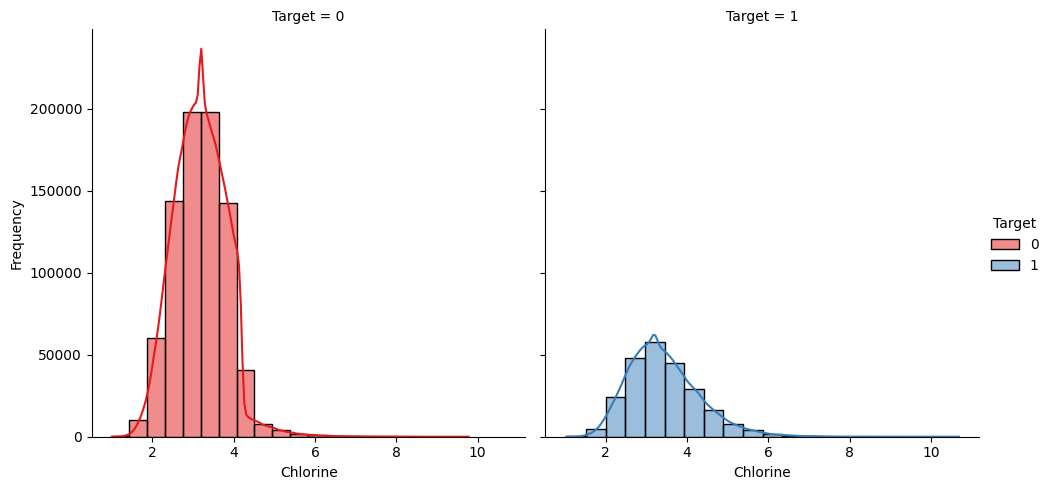

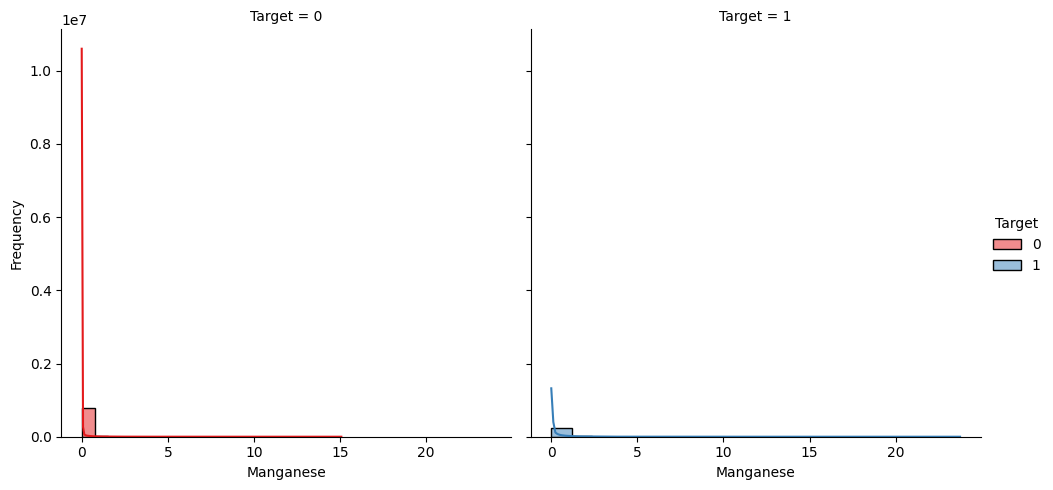

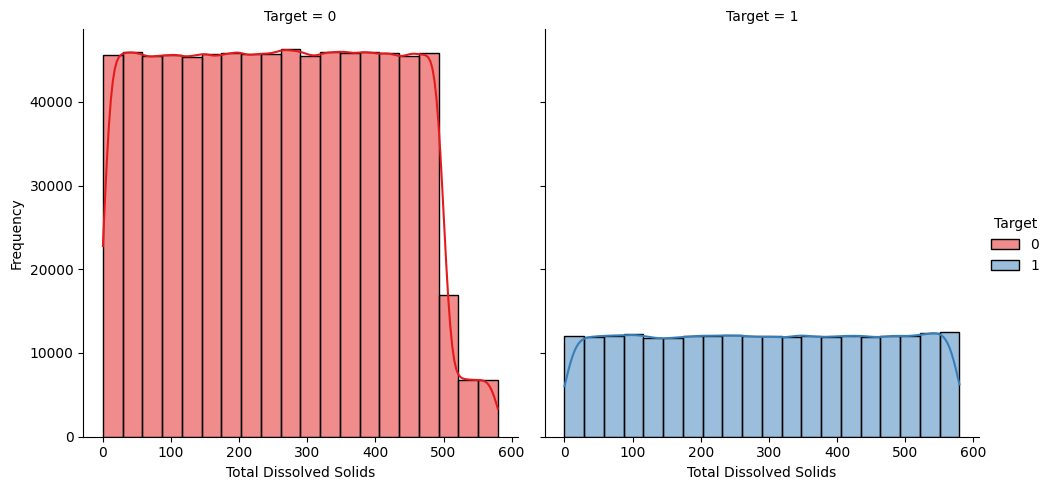

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визначення стовпців для аналізу
columns_to_analyze = list(data.columns)
columns_to_analyze.remove('Target')  # Вилучаємо таргет для аналізу

# Побудова графіків
for col in columns_to_analyze:
    # Побудова графіків для кожного таргету окремо
    g = sns.FacetGrid(data, col="Target", hue="Target", palette="Set1", height=5)
    g.map(sns.histplot, col, bins=20, kde=True)
    g.set_axis_labels(col, "Frequency")
    g.add_legend()
    plt.show()


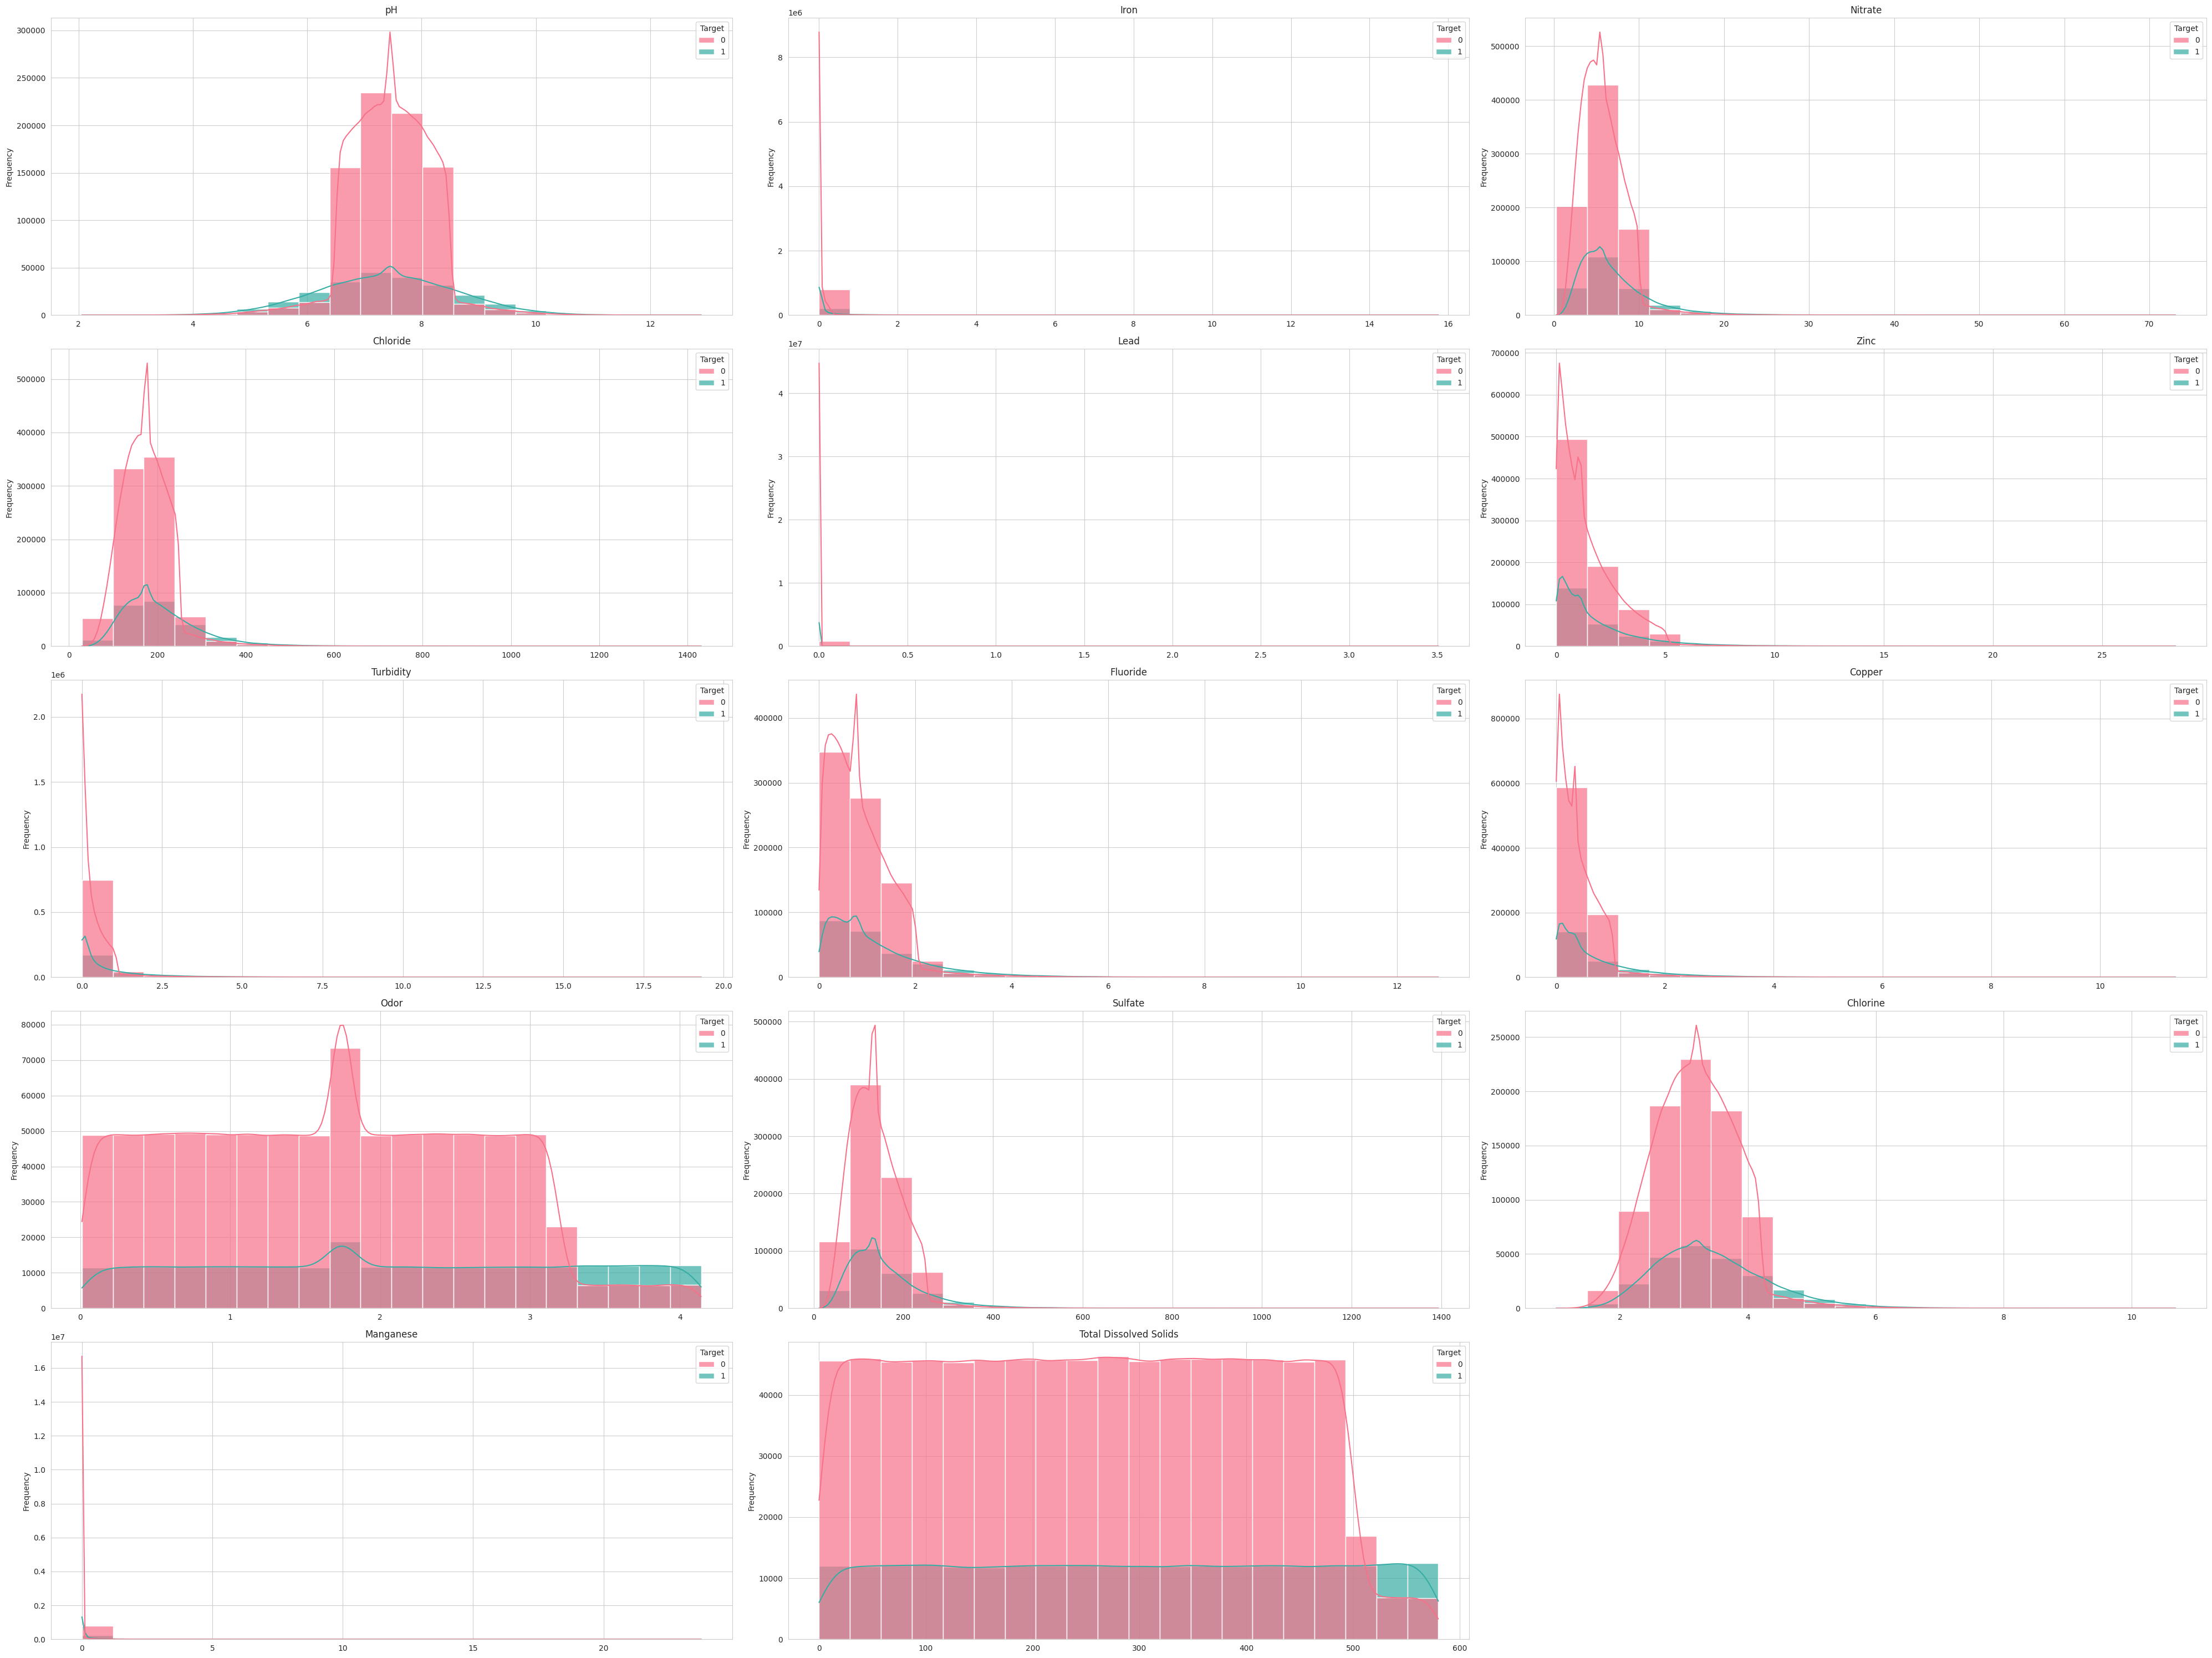

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Виведення графіків для кожного рівня розподілу води з розділенням за значенням таргету
plt.figure(figsize=(40, 30))

# Кількість параметрів
num_params = len(data.columns) - 1  # Мінус 1 для виключення стовпця таргету

# Побудова графіків для кожного параметра
for i, col in enumerate(data.columns[:-1]):  # Цикл за всіма параметрами крім таргету
    plt.subplot(num_params // 3 + 1, 3, i + 1)
    sns.histplot(data=data, x=col, hue='Target', bins=20, kde=True, palette='husl', alpha=0.7)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Вибір ознак та цільової змінної
X = data.drop(columns='Target')
y = data['Target']

# Розподіл даних на тренувальні та тестові набори у співвідношенні 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведення розмірів тренувального та тестового наборів
print(f'Train set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Train set size: 838860 samples
Test set size: 209715 samples


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Створюємо параметри для пошуку
param_grid = {'n_neighbors': range(1, 10)}

# Ініціалізуємо KNN класифікатор
knn = KNeighborsClassifier()

# Використовуємо GridSearchCV для пошуку найкращого значення K
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Отримуємо найкраще значення K
best_k = grid_search.best_params_['n_neighbors']

print("Найкраще значення K:", best_k)

Найкраще значення K: 9


In [ ]:
from sklearn.metrics import accuracy_score
knn = grid_search.best_estimator_
knn.fit(X_train, y_train)

train_prediction_knn = knn.predict(X_train)
test_prediction_knn = knn.predict(X_test)

train_accuracy_knn = accuracy_score(train_prediction_knn, y_train)
test_accuracy_knn = accuracy_score(test_prediction_knn, y_test)

print("[KNN] Training Accuracy:", train_accuracy_knn)
print("[KNN] Test Accuracy:", test_accuracy_knn)


[KNN] Training Accuracy: 0.8238776434685168
[KNN] Test Accuracy: 0.8066185060677586


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Звіт про класифікацію для тестових даних
class_report = classification_report(y_test, test_prediction_knn)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88    161610
           1       0.64      0.35      0.46     48105

    accuracy                           0.81    209715
   macro avg       0.74      0.65      0.67    209715
weighted avg       0.79      0.81      0.78    209715



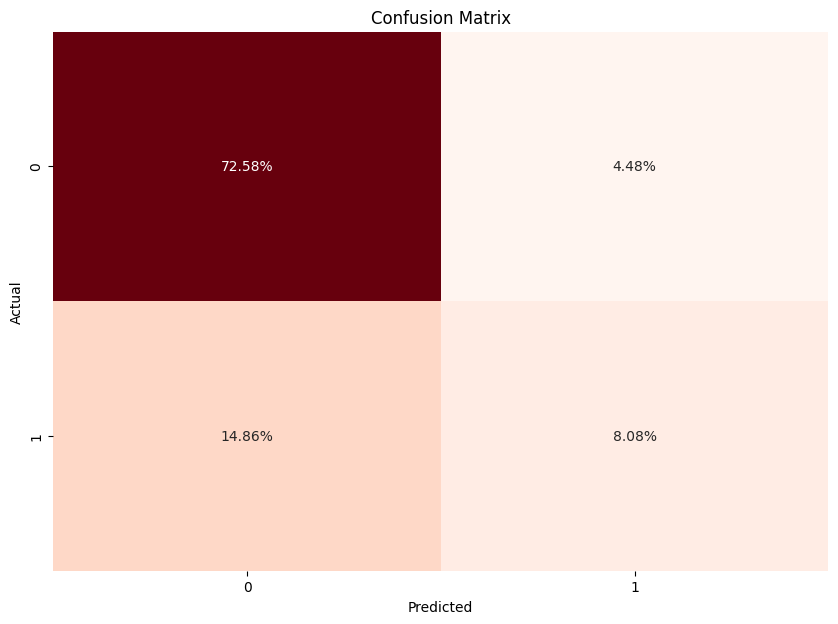

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Матриця невідповідностей для тестових даних
cm = confusion_matrix(y_test, test_prediction_knn)

# Візуалізація матриці невідповідностей
plt.figure(figsize=(10, 7))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='0.2%', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


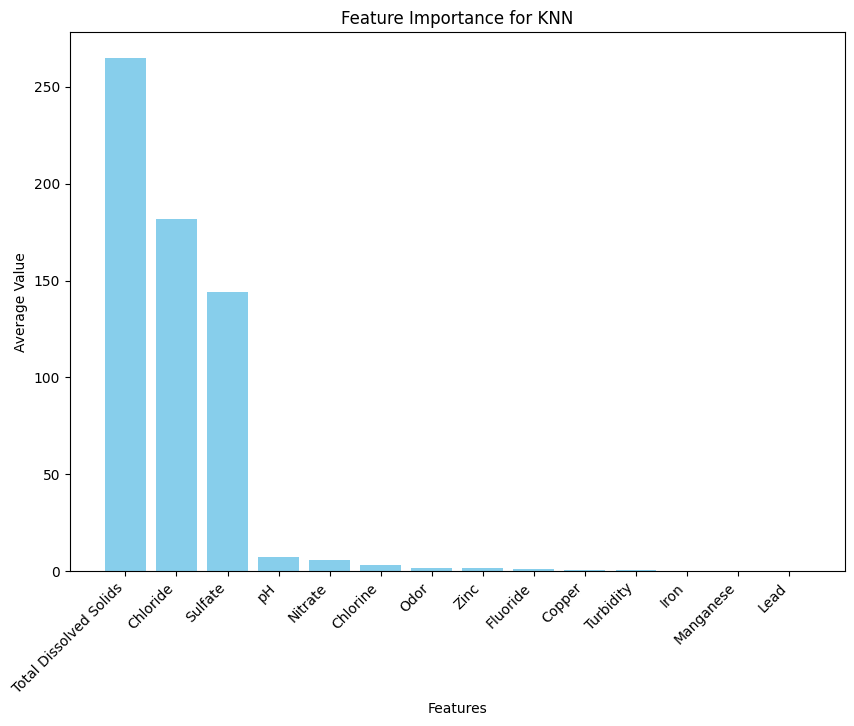

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Обчислення середніх значень кожної ознаки
feature_means = X_train.mean()

# Сортування ознак за середнім значенням
sorted_features = feature_means.sort_values(ascending=False)

# Відображення стовпчикової діаграми важливості ознак
plt.figure(figsize=(10, 7))
plt.bar(sorted_features.index, sorted_features.values, color='skyblue')
plt.title('Feature Importance for KNN')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
test_prediction_rfc = rfc.predict(X_test)
train_prediction_rfc = rfc.predict(X_train)

test_accuracy_rfc = accuracy_score(y_test, test_prediction_rfc)
train_accuracy_rfc = accuracy_score(y_train, train_prediction_rfc)
print("[RFC] Training Accuracy:", train_accuracy_rfc)
print("[RFC] Test Accuracy:", test_accuracy_rfc)



[RFC] Training Accuracy: 0.9999701976491906
[RFC] Test Accuracy: 0.8753498795985027


In [ ]:
# Звіт про класифікацію для тестових даних
class_report_rfc = classification_report(y_test, test_prediction_rfc)
print("Classification Report for Random Forest Classifier:\n", class_report_rfc)

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91    161610
           1       0.66      0.96      0.78     48105

    accuracy                           0.88    209715
   macro avg       0.82      0.91      0.85    209715
weighted avg       0.91      0.88      0.88    209715



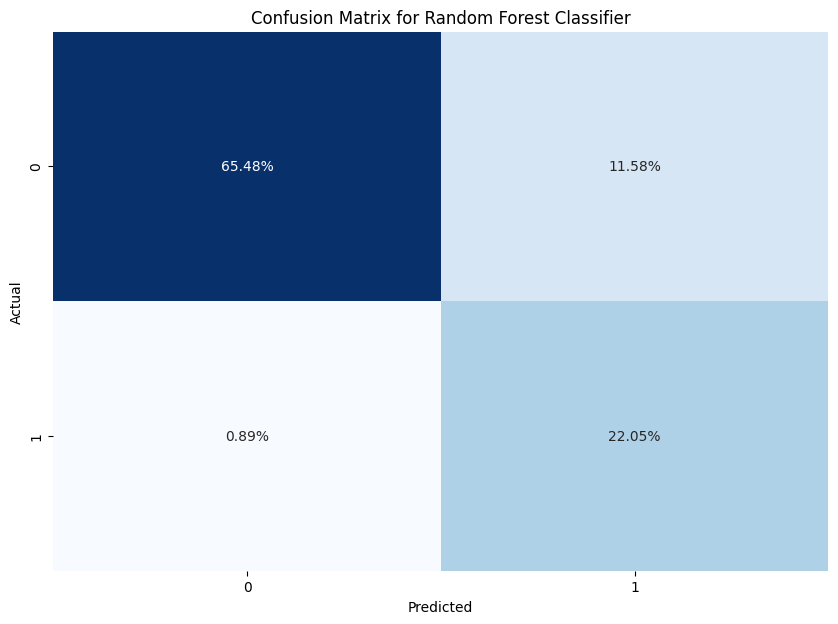

In [ ]:
from sklearn.metrics import confusion_matrix

# Обчислення матриці невідповідностей для тестових даних
cm_rfc = confusion_matrix(y_test, test_prediction_rfc)

# Візуалізація матриці невідповідностей
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rfc / np.sum(cm_rfc), annot=True, fmt='0.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


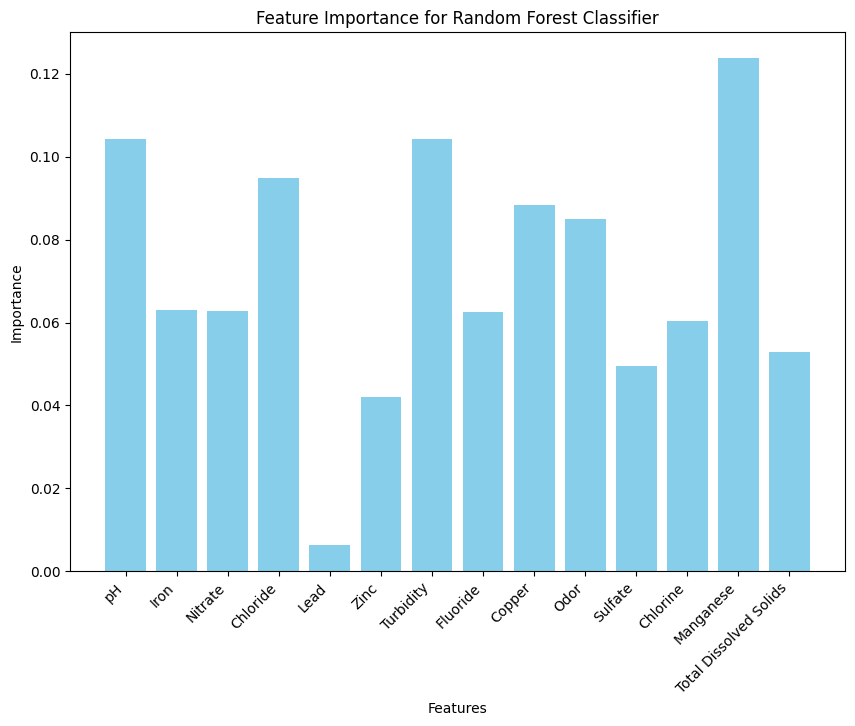

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Обчислення важливості ознак для Random Forest Classifier
feature_importance = rfc.feature_importances_

# Створення списку назв ознак
features = X.columns

# Створення стовпчикової діаграми з важливістю ознак
plt.figure(figsize=(10, 7))
plt.bar(features, feature_importance, color='skyblue')
plt.title('Feature Importance for Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

train_predictions_dtc = dtc.predict(X_train)
test_predictions_dtc = dtc.predict(X_test)

train_accuracy_dtc = accuracy_score(y_train, train_predictions_dtc)
test_accuracy_dtc = accuracy_score(y_test, test_predictions_dtc)

print("[DTC] Training Accuracy:", train_accuracy_dtc)
print("[DTC] Test Accuracy:", test_accuracy_dtc)


[DTC] Training Accuracy: 1.0
[DTC] Test Accuracy: 0.8363684047397659


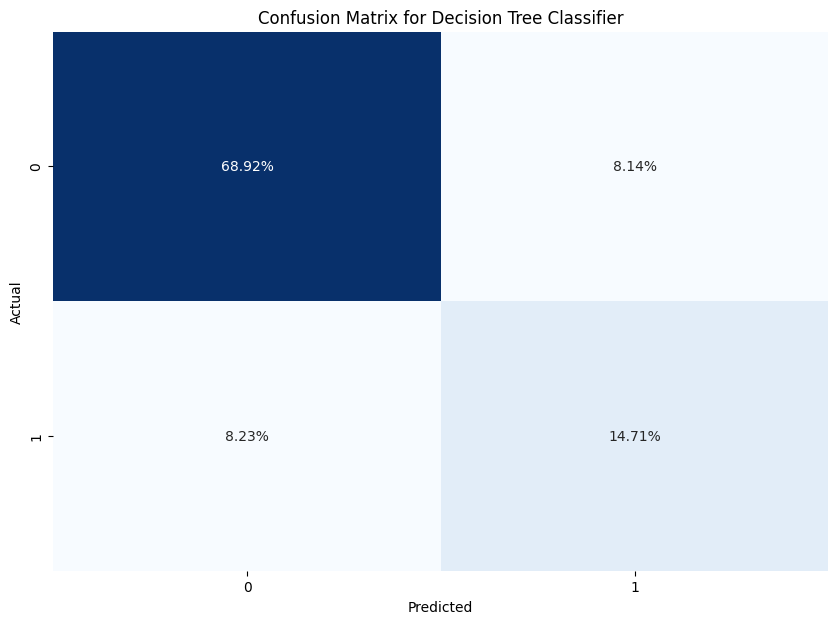

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Матриця невідповідностей для тестових даних
cm_dtc = confusion_matrix(y_test, test_predictions_dtc)

# Візуалізація матриці невідповідностей
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dtc / np.sum(cm_dtc), annot=True, fmt='0.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

# Звіт про класифікацію для тестових даних
class_report_dtc = classification_report(y_test, test_predictions_dtc)
print("Classification Report for Decision Tree Classifier:\n", class_report_dtc)


Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89    161610
           1       0.64      0.64      0.64     48105

    accuracy                           0.84    209715
   macro avg       0.77      0.77      0.77    209715
weighted avg       0.84      0.84      0.84    209715



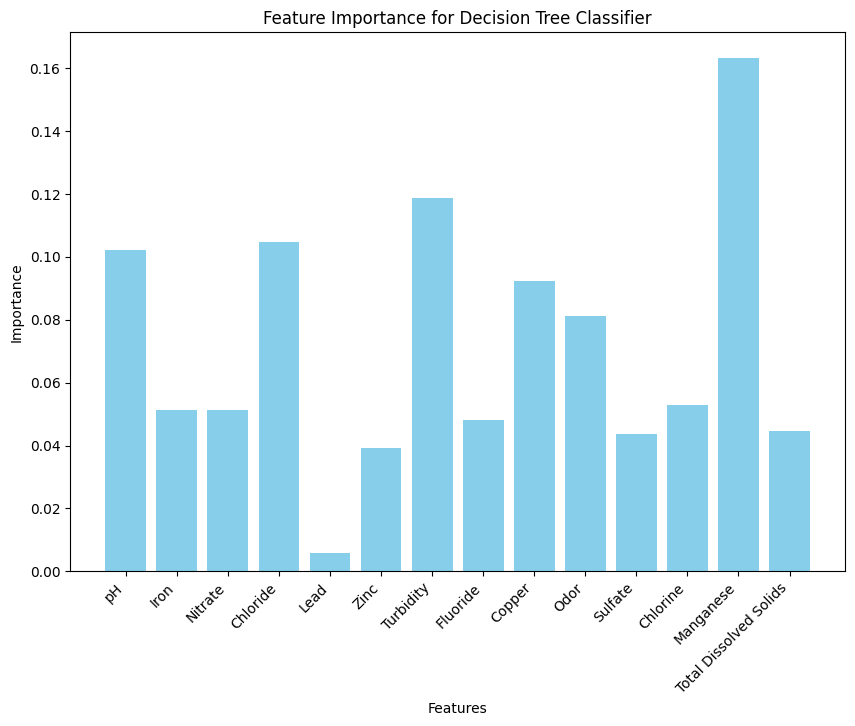

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Обчислення важливості ознак для Decision Tree Classifier
feature_importance_dtc = dtc.feature_importances_

# Створення списку назв ознак
features_dtc = X.columns

# Створення стовпчикової діаграми з важливістю ознак
plt.figure(figsize=(10, 7))
plt.bar(features_dtc, feature_importance_dtc, color='skyblue')
plt.title('Feature Importance for Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()
